**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Importing dataset**

In [ ]:
data = pd.read_csv("/content/Admission_Predict_hackathon1.csv")

**Data Understanding**

In [ ]:
print(data.shape)

(400, 9)


In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Data Preprocessing**

In [ ]:
data = data.drop("Serial No.",axis=1)

In [ ]:
print(data.shape)

(400, 8)


In [ ]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Exploratory Data Analysis**

In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
data.isnull().any

<bound method DataFrame.any of      GRE Score  TOEFL Score  ...  Research  Chance of Admit 
0        False        False  ...     False             False
1        False        False  ...     False             False
2        False        False  ...     False             False
3        False        False  ...     False             False
4        False        False  ...     False             False
..         ...          ...  ...       ...               ...
395      False        False  ...     False             False
396      False        False  ...     False             False
397      False        False  ...     False             False
398      False        False  ...     False             False
399      False        False  ...     False             False

[400 rows x 8 columns]>

In [ ]:
data[data['CGPA']>8].groupby('CGPA').mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,Research,Chance of Admit
CGPA,,,,,,,
8.01,306.000000,99.000000,1.000000,1.000000,2.000000,0.500000,0.550000
8.02,307.000000,102.333333,3.000000,2.500000,3.000000,0.666667,0.596667
8.03,298.333333,98.333333,1.666667,2.833333,2.833333,0.333333,0.540000
8.04,308.666667,100.666667,2.666667,2.833333,3.166667,0.333333,0.656667
8.06,303.000000,100.000000,2.000000,3.000000,3.500000,1.000000,0.640000
...,...,...,...,...,...,...,...
9.80,335.333333,115.666667,4.666667,4.000000,4.000000,1.000000,0.956667
9.82,335.000000,117.000000,5.000000,5.000000,5.000000,1.000000,0.960000
9.87,334.000000,120.000000,5.000000,4.000000,5.000000,1.000000,0.970000


In [ ]:
data[data['GRE Score']>320].groupby('GRE Score').mean()

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,,,,,,,
321,110.153846,3.538462,3.615385,3.923077,8.843846,0.846154,0.810000
322,109.714286,3.785714,3.928571,3.857143,8.827143,0.785714,0.802857
323,109.800000,3.700000,3.900000,3.900000,8.862000,0.800000,0.770000
324,110.052632,3.789474,3.736842,3.605263,8.868947,0.894737,0.803684
325,110.692308,3.384615,3.500000,3.576923,8.869231,0.769231,0.726154
326,111.454545,3.454545,3.863636,3.590909,9.058182,0.909091,0.819091
327,110.333333,3.750000,3.708333,3.750000,8.815000,0.833333,0.783333
328,111.833333,4.166667,4.500000,4.000000,9.183333,1.000000,0.828333
329,113.000000,3.888889,4.166667,4.277778,9.136667,1.000000,0.848889


In [ ]:
data[data['TOEFL Score']>100].groupby('TOEFL Score').mean()

,GRE Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
TOEFL Score,,,,,,,
101,306.454545,2.090909,2.545455,2.863636,8.012727,0.181818,0.584545
102,308.117647,2.705882,3.000000,3.235294,8.328235,0.235294,0.650000
103,312.937500,2.625000,3.156250,3.312500,8.351250,0.187500,0.685625
104,312.440000,2.880000,3.240000,3.440000,8.370000,0.400000,0.686000
105,310.678571,2.500000,2.785714,2.910714,8.241786,0.285714,0.643571
106,312.250000,2.666667,3.208333,3.250000,8.360000,0.375000,0.672083
107,314.961538,2.807692,3.288462,3.365385,8.522308,0.653846,0.710769
108,316.882353,3.470588,3.735294,3.588235,8.582941,0.411765,0.708824
109,317.294118,3.176471,3.588235,3.558824,8.717059,0.588235,0.748235


**Data Visualization**

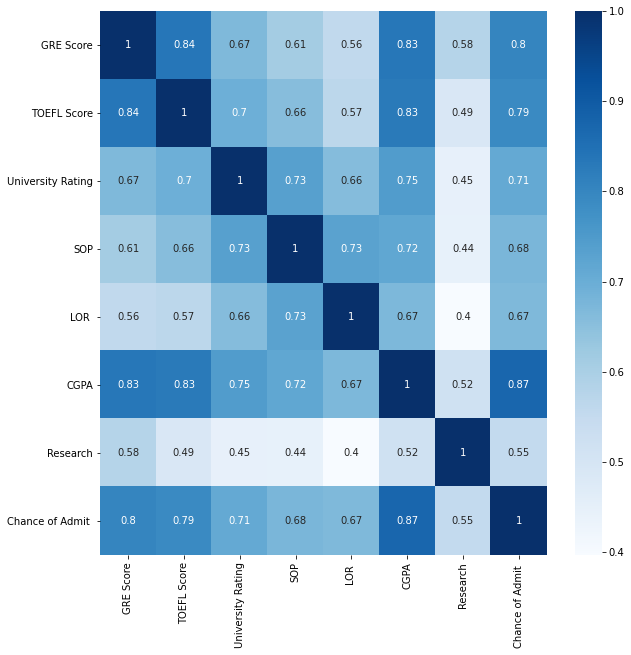

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True,cmap='Blues')



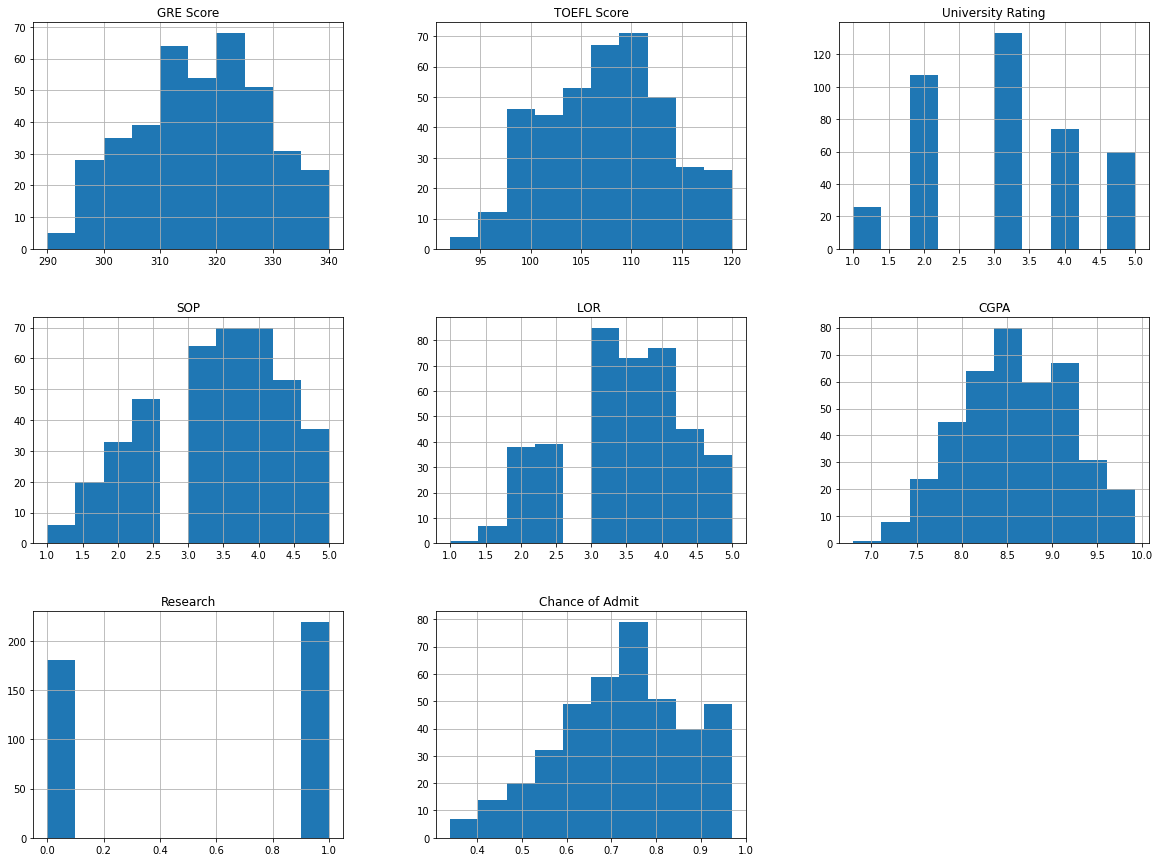

In [ ]:
data.hist(bins=10, figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CGPA vs Chance of Admit')

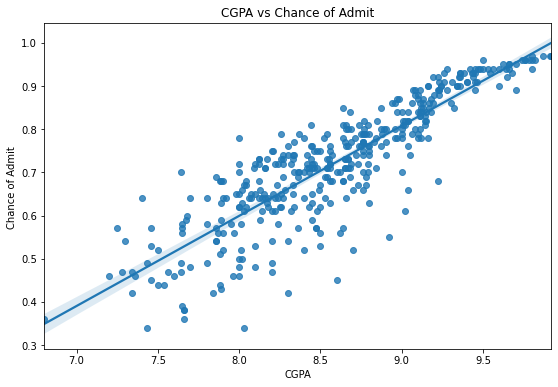

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.regplot(data['CGPA'], data['Chance of Admit '])
plt.title('CGPA vs Chance of Admit')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'GRE Scores vs Chance of Admit')

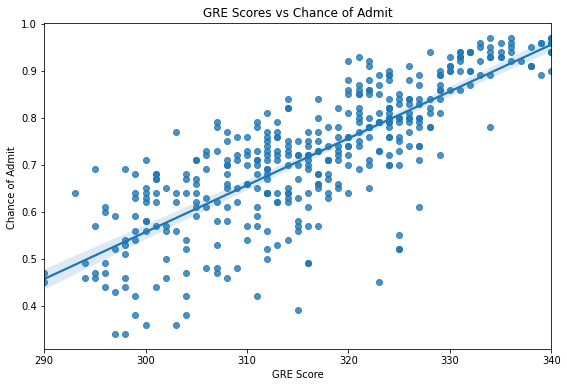

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.regplot(data['GRE Score'], data['Chance of Admit '])
plt.title('GRE Scores vs Chance of Admit')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TOEFL Scores vs Chance of Admit')

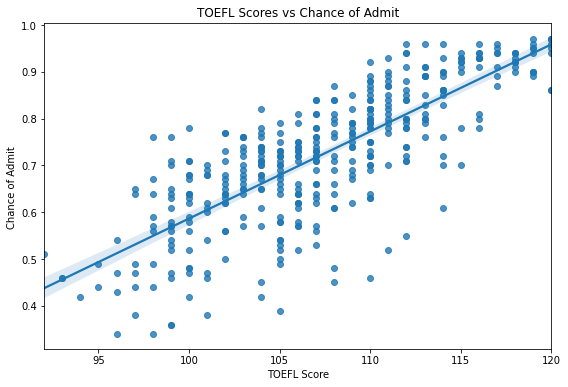

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
sns.regplot(data['TOEFL Score'], data['Chance of Admit '])
plt.title('TOEFL Scores vs Chance of Admit')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Applicants')

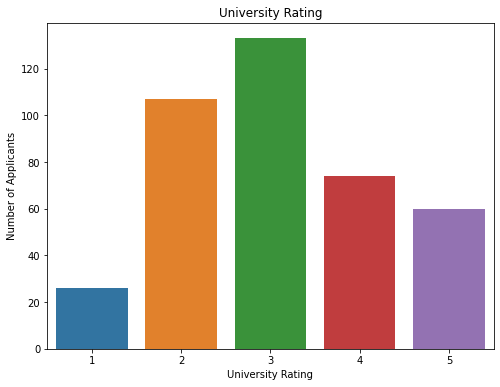

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data['University Rating'])
plt.title('University Rating')
plt.ylabel('Number of Applicants')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Applicants')

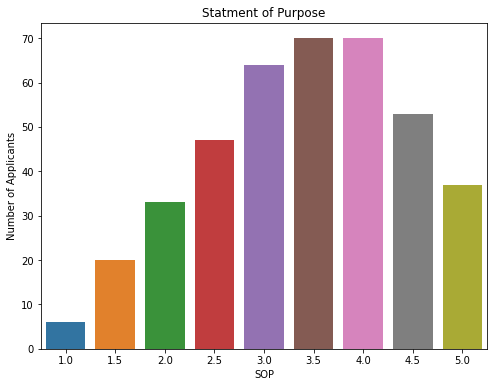

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data['SOP'])
plt.title('Statment of Purpose')
plt.ylabel('Number of Applicants')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Applicants')

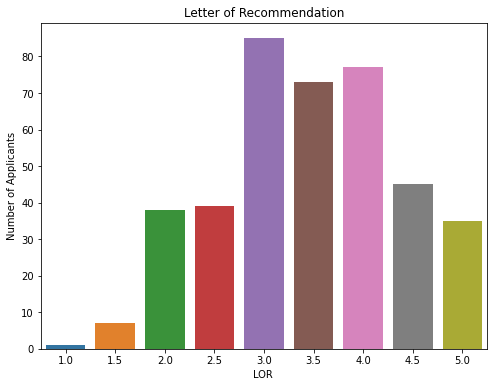

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data['LOR '])
plt.title('Letter of Recommendation')
plt.ylabel('Number of Applicants')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'No Research Experience'), Text(0, 0, 'Has Research Experience')]

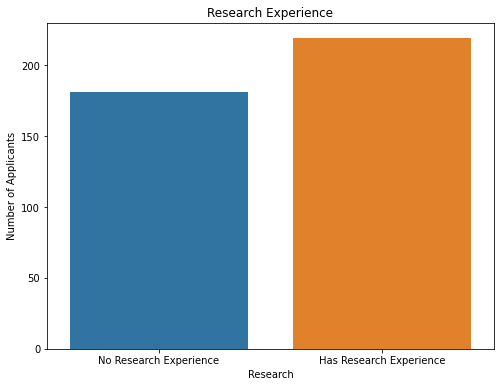

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data['Research'])
plt.title('Research Experience')
plt.ylabel('Number of Applicants')
ax.set_xticklabels(['No Research Experience', 'Has Research Experience'])

**Model Building And Training**

In [ ]:
features = data.drop(columns=['Chance of Admit '])
target = data['Chance of Admit ']


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size=0.80, random_state=35)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(320, 7)
(320,)
(80, 7)
(80,)


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linearRegression_model = LinearRegression()
linearRegression_model.fit(x_train, y_train)

predictions = linearRegression_model.predict(x_test)


In [ ]:
mean_squared_error_linearregression = mean_squared_error(y_test, predictions)
print('MSE: ',mean_squared_error_linearregression)
print('RMSE :  ',(mean_squared_error(y_test,predictions))**0.5)
r_squared_value_linearregression = r2_score(y_test, predictions)
print('r2 score: ',r_squared_value_linearregression)


MSE:  0.004347840317076556
RMSE :   0.06593815524471819
r2 score:  0.8069737750079603


**Random Forests**

In [ ]:
#building a model with random forest regression

from sklearn.ensemble import RandomForestRegressor

randomForest_model = RandomForestRegressor(n_estimators=500)
randomForest_model.fit(x_train, y_train)
predictions = randomForest_model.predict(x_test)


In [ ]:
mean_squared_error_randomforest = mean_squared_error(y_test, predictions)
print('MSE: ',mean_squared_error_randomforest)
print('RMSE :  ',(mean_squared_error(y_test,predictions))**0.5)
r_squared_value_randomforest = r2_score(y_test, predictions)
print('r2 score: ',r_squared_value_randomforest)


MSE:  0.005724620910000018
RMSE :   0.07566122461340431
r2 score:  0.7458503801467137


**Decision Tree**

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(x_train, y_train)

predictions = decisionTree_model.predict(x_test)


In [ ]:
mean_squared_error_decisiontree = mean_squared_error(y_test, predictions)
print('MSE: ',mean_squared_error_decisiontree)
print('RMSE :  ',(mean_squared_error(y_test,predictions))**0.5)
r_squared_value_decisiontree = r2_score(y_test, predictions)
print('r2 score: ',r_squared_value_decisiontree)


MSE:  0.01005875
RMSE :   0.10029331981742354
r2 score:  0.5534328772349686


**KNN**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(x_train, y_train)
predictions = knn_model.predict(x_test)

In [ ]:
mean_squared_error_knn = mean_squared_error(y_test, predictions)
print('MSE: ',mean_squared_error_knn)
print('RMSE :  ',(mean_squared_error(y_test,predictions))**0.5)
r_squared_value_knn = r2_score(y_test, predictions)
print('r2 score: ',r_squared_value_knn)


MSE:  0.005481262500000001
RMSE :   0.0740355488937578
r2 score:  0.7566544924821809


**Comparing the mean  squared error values of all the four algorithms**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'mean squared error')

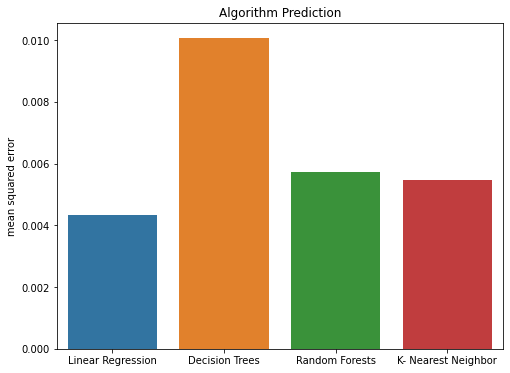

In [ ]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests','K- Nearest Neighbor']
Scores = np.array([mean_squared_error_linearregression, mean_squared_error_decisiontree, mean_squared_error_randomforest, mean_squared_error_knn])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction')
plt.ylabel('mean squared error')

**Comparing the r - squared values of all the four
 algorithms**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'r-squared score')

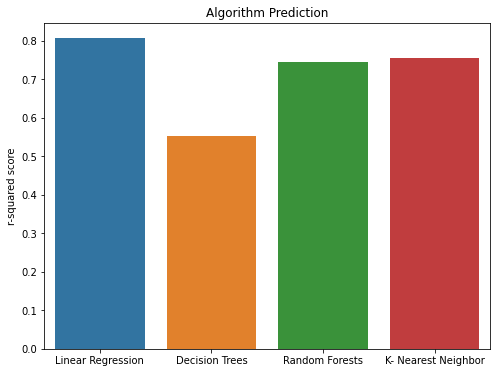

In [ ]:
Methods = ['Linear Regression', 'Decision Trees', 'Random Forests','K- Nearest Neighbor']
Scores = np.array([r_squared_value_linearregression, r_squared_value_decisiontree, r_squared_value_randomforest, r_squared_value_knn])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction')
plt.ylabel('r-squared score')